In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
df.shape

(891, 8)

In [9]:
df["Age"] = df["Age"].fillna(1)

In [10]:
df["Embarked"] = df["Embarked"].fillna("None")

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.997946,0.523008,0.381594,32.204208
std,0.486592,0.836071,17.329598,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

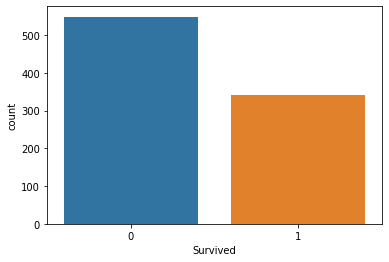

In [14]:
sns.countplot(data=df, x="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

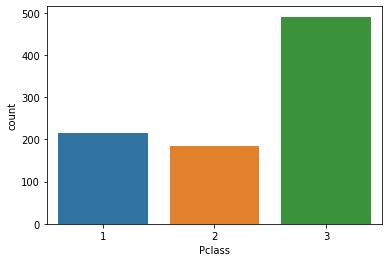

In [15]:
sns.countplot(data=df, x="Pclass")

<AxesSubplot:xlabel='Sex', ylabel='count'>

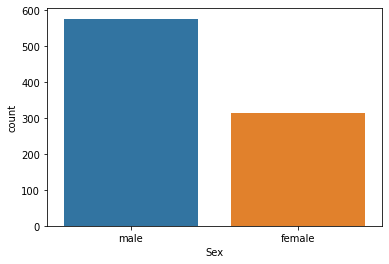

In [16]:
sns.countplot(data=df, x="Sex")

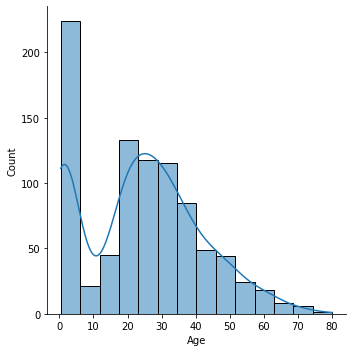

In [17]:
sns.displot(data=df, x="Age", kde=True)

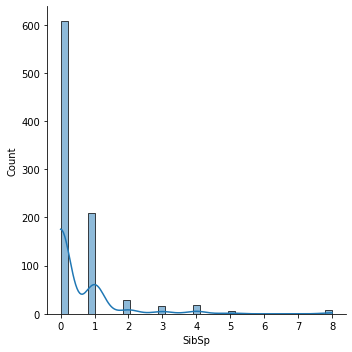

In [18]:
sns.displot(data=df, x="SibSp", kde=True)

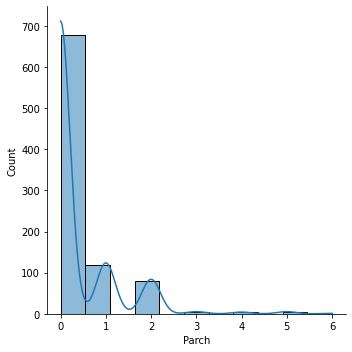

In [19]:
sns.displot(data=df, x="Parch", kde=True)

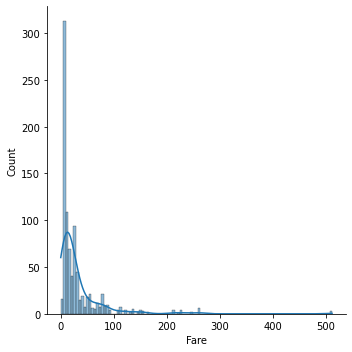

In [20]:
sns.displot(data=df, x="Fare", kde=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

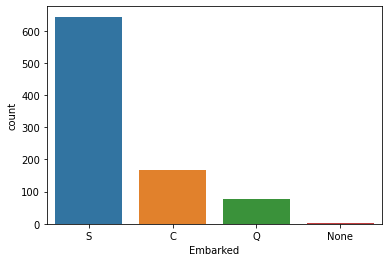

In [21]:
sns.countplot(data=df, x="Embarked")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

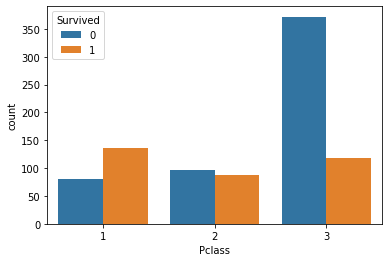

In [22]:
sns.countplot(data=df, x="Pclass", hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

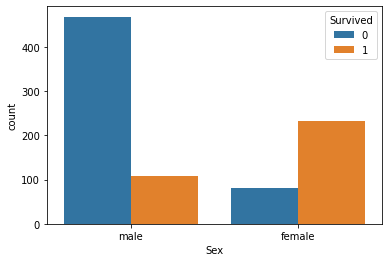

In [23]:
sns.countplot(data=df, x="Sex", hue="Survived")

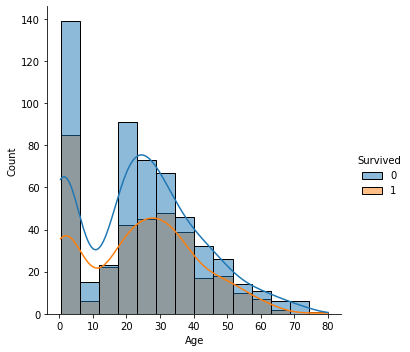

In [24]:
sns.displot(data=df, x="Age", hue="Survived", kde=True)

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

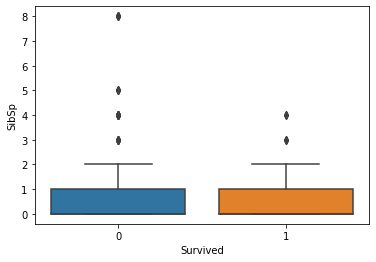

In [25]:
sns.boxplot(data=df, x="Survived", y="SibSp")

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

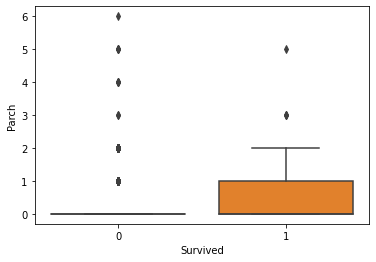

In [26]:
sns.boxplot(data=df, x="Survived", y="Parch")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

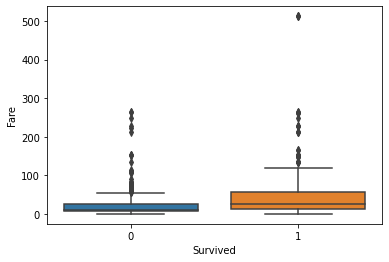

In [27]:
sns.boxplot(data=df, x="Survived", y="Fare")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

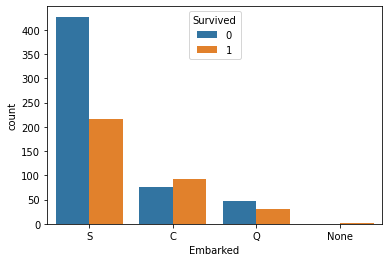

In [28]:
sns.countplot(data=df, x="Embarked", hue="Survived")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

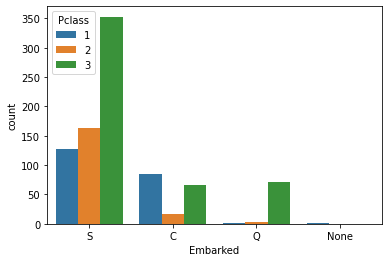

In [29]:
sns.countplot(data=df, x="Embarked", hue="Pclass")

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
label = "Survived"
numeric_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Sex", "Embarked"]
features = numeric_features + categorical_features

In [33]:
x, y = df[features], df[label]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
numeric_tranf = Pipeline(steps=[("scaler", StandardScaler())])
categorical_tranf = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(transformers=[("num", numeric_tranf, numeric_features),
                                               ("cat", categorical_tranf, categorical_features)])
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", SVC())])

In [36]:
model = pipeline.fit(x_train, y_train)

In [37]:
predictions = model.predict(x_test)

In [38]:
confusion_matrix(y_test, predictions)

array([[166,  10],
       [ 38,  54]], dtype=int64)

In [39]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

In [40]:
print("Precision: ", precision * 100, "%")
print("Recall: ", recall * 100, "%")

Precision:  84.375 %
Recall:  58.69565217391305 %
